In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("Store Sales.csv")
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6751,FDS59,14.80,Regular,0.044072,Breads,109.0570,OUT018,2009,Medium,Tier 3,Supermarket Type2,1428.1410
1560,FDL09,NaN,Regular,0.224175,Snack Foods,168.8816,OUT019,1985,Small,Tier 1,Grocery Store,167.7816
7598,FDI20,NaN,Low Fat,0.067520,Fruits and Vegetables,211.3586,OUT019,1985,Small,Tier 1,Grocery Store,422.1172
1526,FDR24,17.35,Regular,0.063207,Baking Goods,89.3830,OUT017,2007,NaN,Tier 2,Supermarket Type1,1258.3620
3517,FDL16,12.85,Low Fat,0.168715,Frozen Foods,47.3060,OUT049,1999,Medium,Tier 1,Supermarket Type1,1071.9380
5200,FDV15,10.30,Low Fat,0.146999,Meat,103.7648,OUT017,2007,NaN,Tier 2,Supermarket Type1,2804.3496
7807,FDW46,NaN,Regular,0.123089,Snack Foods,63.6484,OUT019,1985,Small,Tier 1,Grocery Store,65.2484
6562,FDD39,16.70,Low Fat,0.070441,Dairy,216.8850,OUT018,2009,Medium,Tier 3,Supermarket Type2,6275.1650
7577,FDC44,15.60,Low Fat,0.172597,Fruits and Vegetables,114.8518,OUT046,1997,Small,Tier 1,Supermarket Type1,2163.1842
6571,FDC16,11.50,Regular,0.020566,Dairy,86.0540,OUT035,2004,Small,Tier 2,Supermarket Type1,1384.8640


In [3]:
print("\nTotal Empty cells by columns :\n{}".format(df.isna().sum()),"\n\n")


Total Empty cells by columns :
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 




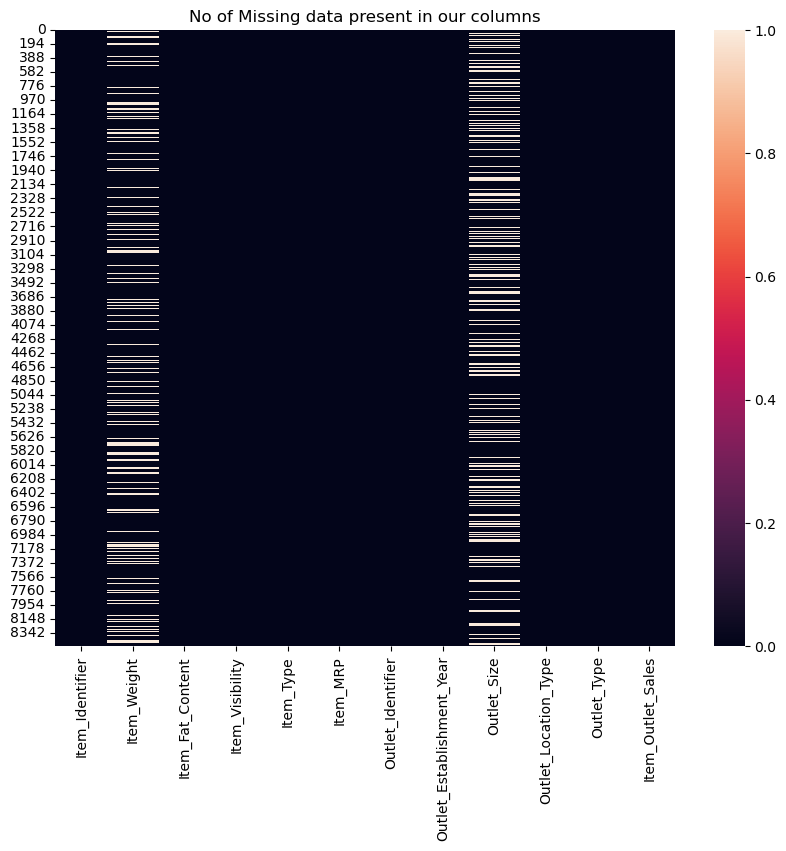

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
plt.title("No of Missing data present in our columns")
plt.show()

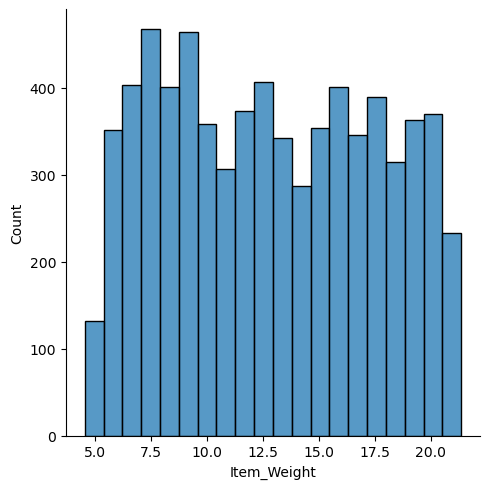

In [5]:
sns.displot(df['Item_Weight'])

In [6]:
df['Item_Weight'].mean()

12.857645184135976

In [7]:
item_weight_range = df.groupby('Item_Type')['Item_Weight'].agg(['min', 'max'])

item_weight_range



,min,max
Item_Type,,
Baking Goods,4.880,20.85
Breads,4.635,20.85
Breakfast,6.425,21.10
Canned,4.615,21.35
Dairy,4.805,20.70
Frozen Foods,4.555,20.85
Fruits and Vegetables,5.460,21.35
Hard Drinks,4.610,19.70
Health and Hygiene,5.175,21.25


In [8]:
item_weight_mean = df.groupby('Item_Type')['Item_Weight'].mean()

In [9]:
for item_type in item_weight_mean.index:
    df.loc[(df['Item_Weight'].isnull()) & (df['Item_Type'] == item_type), 'Item_Weight'] = item_weight_mean[item_type]

In [10]:
if df['Item_Weight'].isnull().any():
    print("Null values present in 'Item_Weight' column.")
    print(df[df['Item_Weight'].isnull()])
else:
    print("No null values found in 'Item_Weight' column.")

No null values found in 'Item_Weight' column.


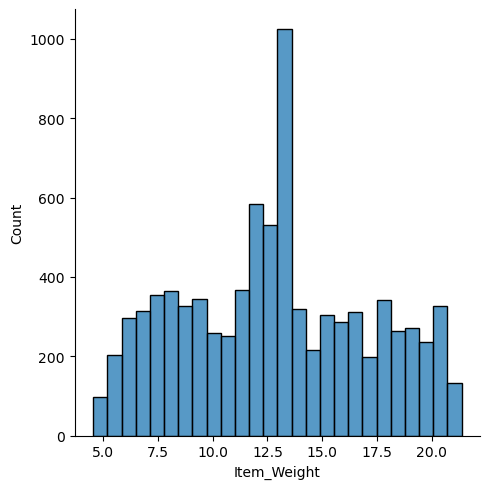

In [11]:
sns.displot(df['Item_Weight'])

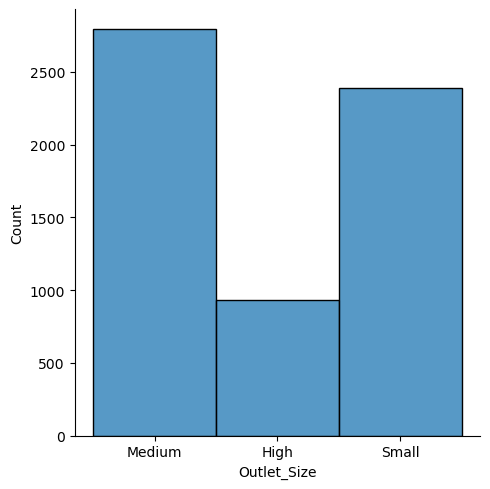

In [12]:
sns.displot(df['Outlet_Size'])

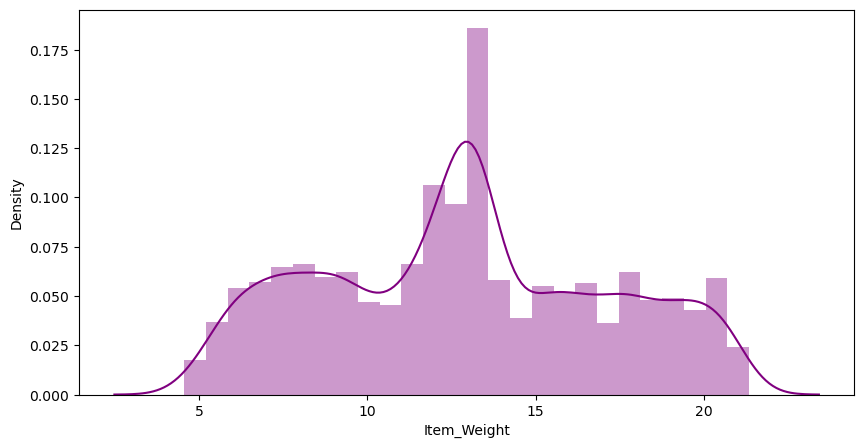

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Weight'],color='purple')
plt.show()

In [14]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [15]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [16]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

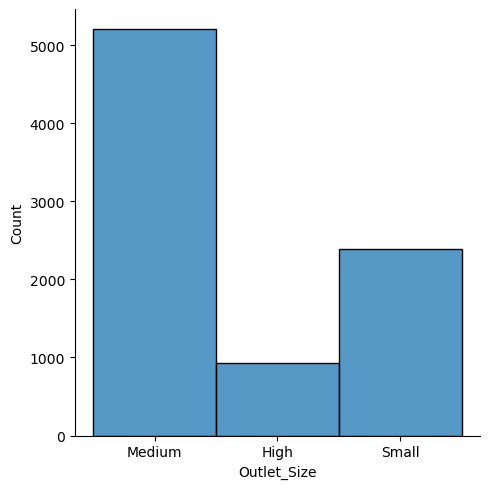

In [17]:
sns.displot(df['Outlet_Size'])

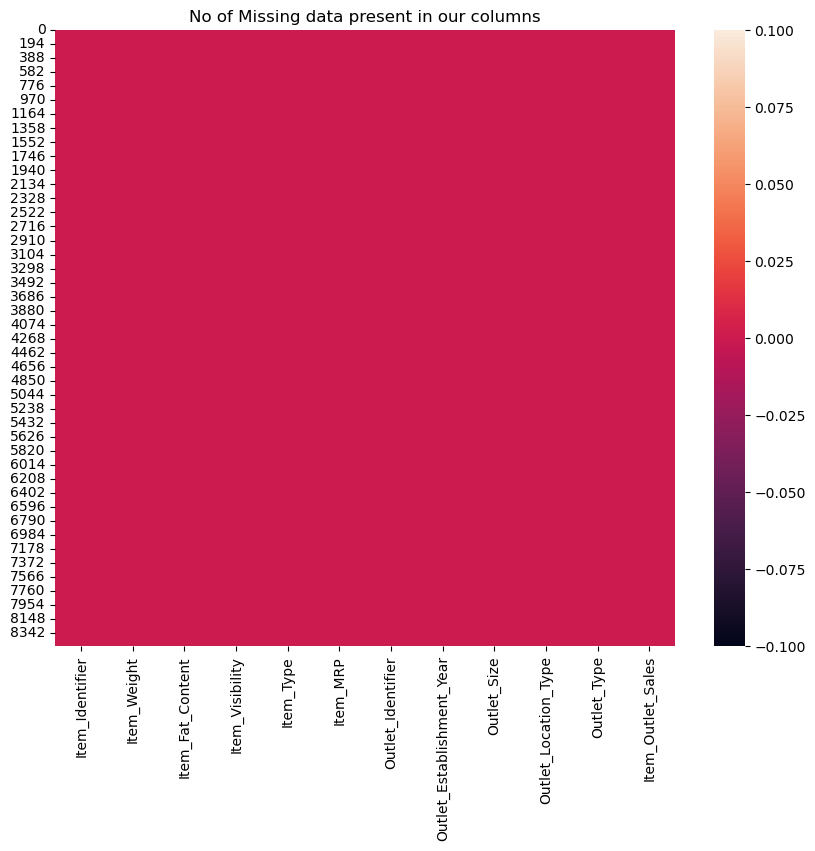

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
plt.title("No of Missing data present in our columns")
plt.show()

In [19]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

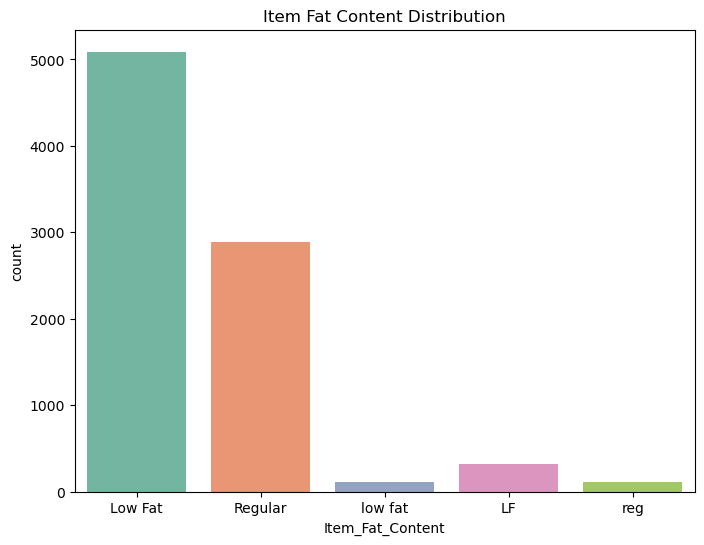

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Item_Fat_Content', palette='Set2')
plt.title('Item Fat Content Distribution')
plt.show()

In [21]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [22]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

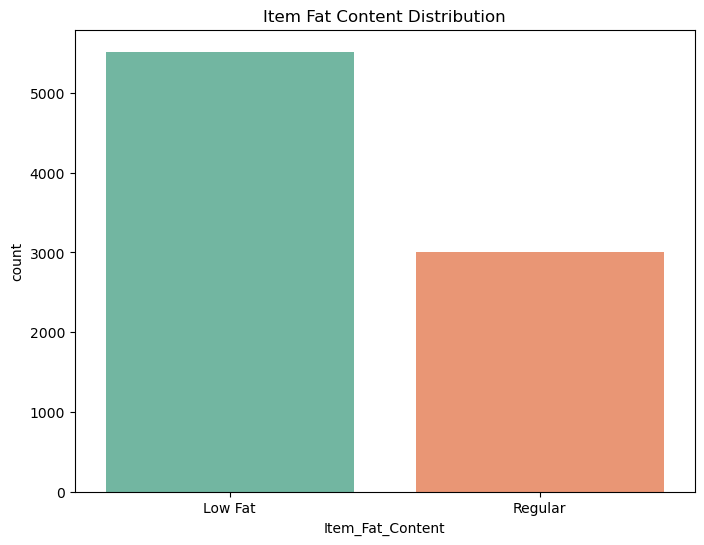

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Item_Fat_Content', palette='Set2')
plt.title('Item Fat Content Distribution')
plt.show()

In [24]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [25]:
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

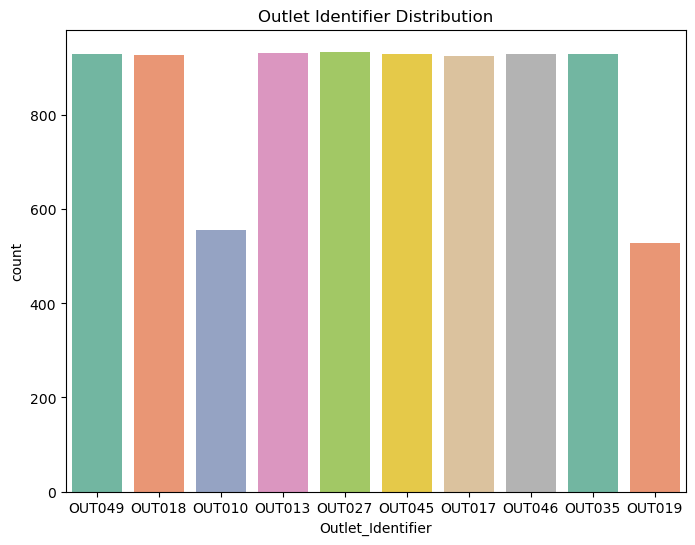

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outlet_Identifier', palette='Set2')
plt.title('Outlet Identifier Distribution')
plt.show()

In [27]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

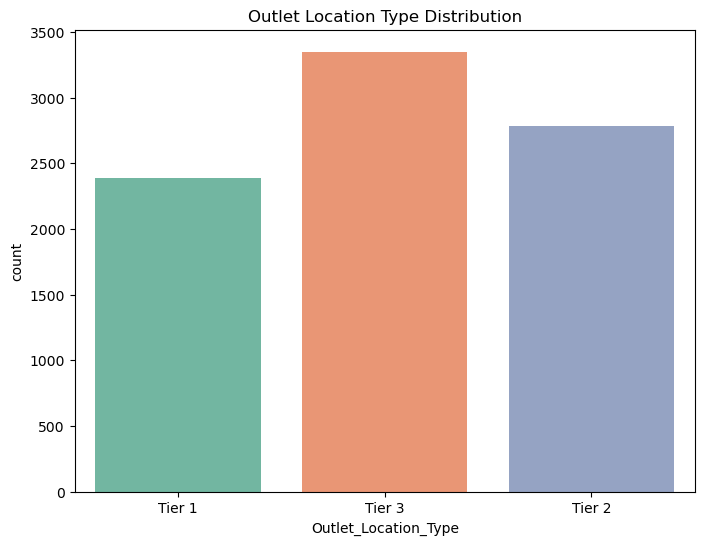

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outlet_Location_Type', palette='Set2')
plt.title('Outlet Location Type Distribution')
plt.show()

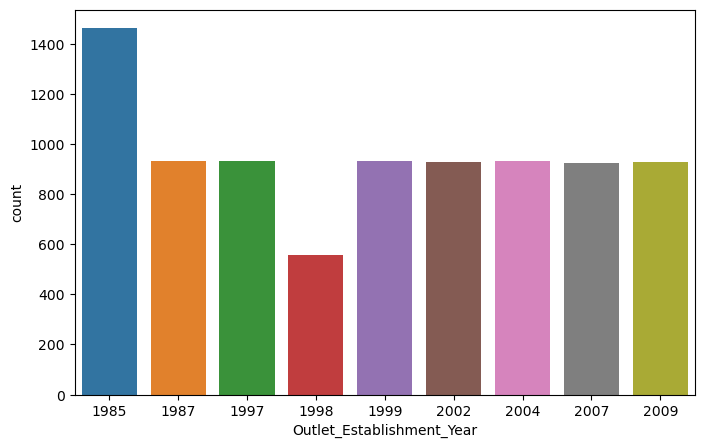

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

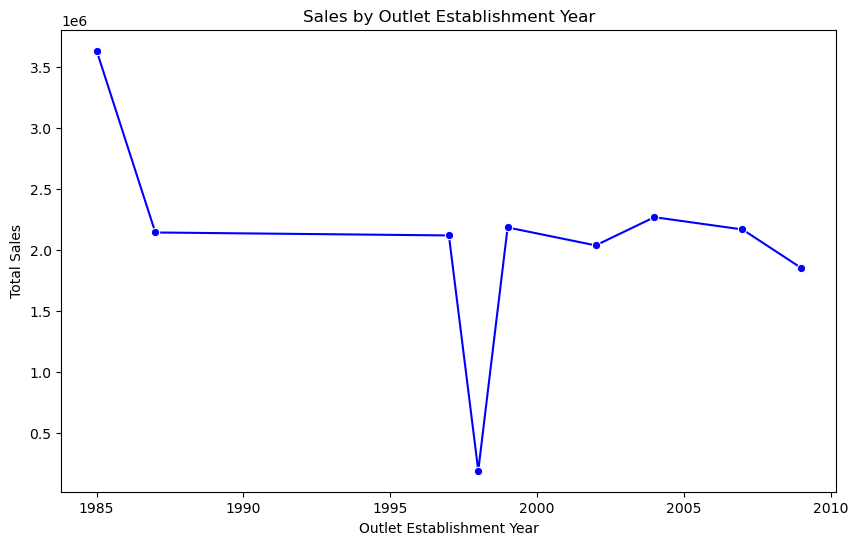

In [30]:
outlet_year_sales = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=outlet_year_sales.index, y=outlet_year_sales.values, marker='o', color='b')
plt.title('Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()

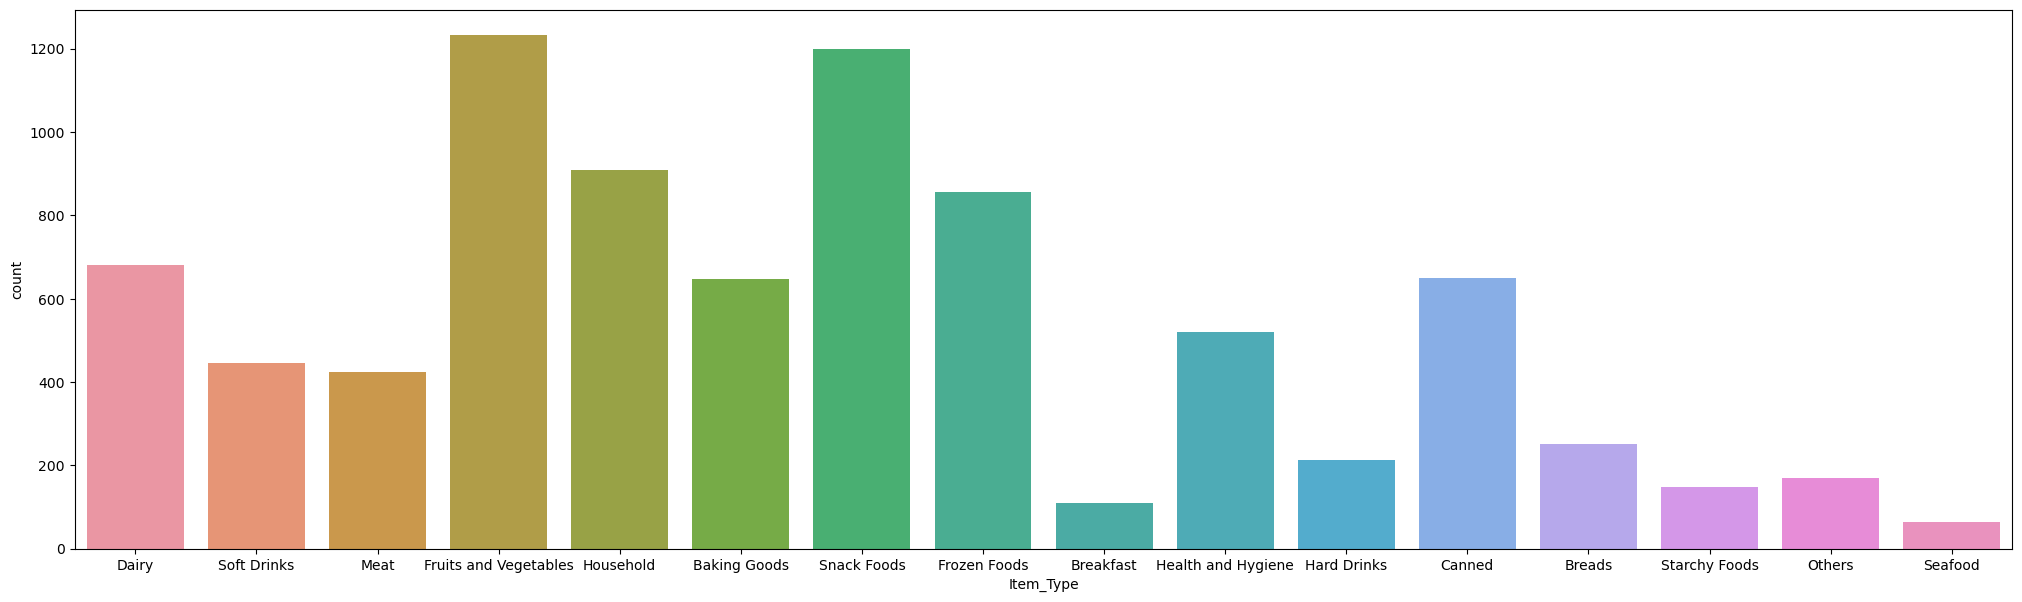

In [31]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=df)
plt.show()

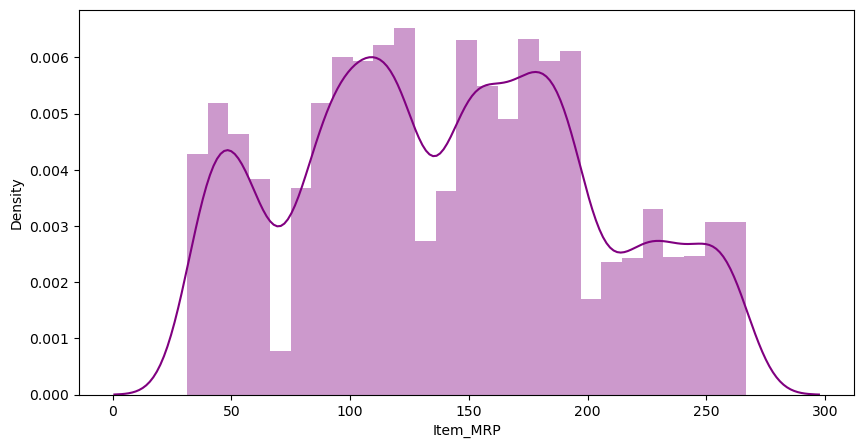

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_MRP'],color='purple')
plt.show()

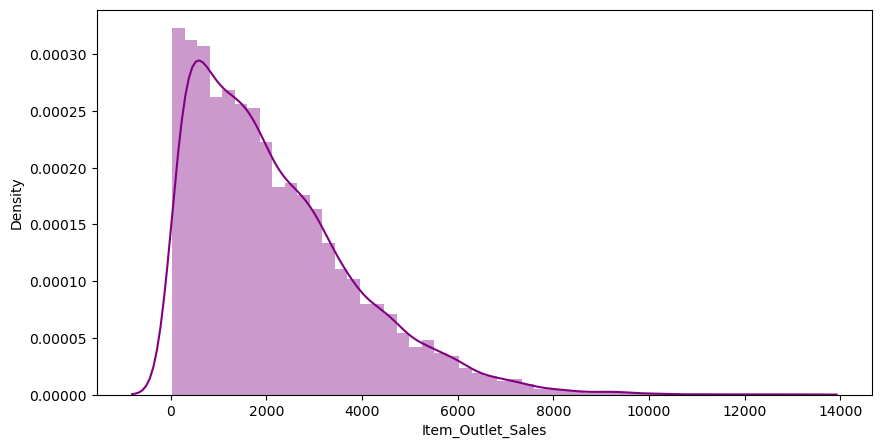

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Outlet_Sales'],color='purple')
plt.show()

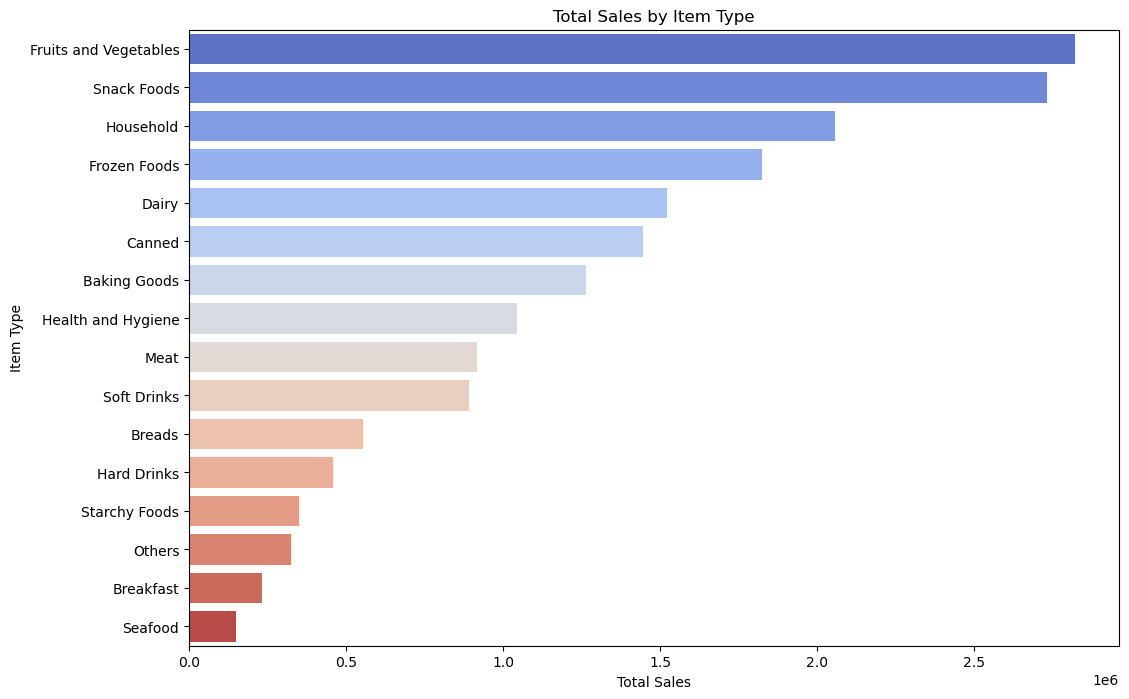

In [34]:
item_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=item_sales.values, y=item_sales.index, palette='coolwarm')
plt.title('Total Sales by Item Type')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.show()

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
df.drop(['Item_Identifier'], axis=1, inplace=True)


In [39]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Identify nominal and ordinal features
nominal_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
ordinal_features = ['Outlet_Establishment_Year'] # You might want to add more based on your domain knowledge

# Create transformers
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse=False for direct array conversion

# Fit and transform ordinal features
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

# Fit and transform nominal features
encoded_nominal_data = onehot_encoder.fit_transform(df[nominal_features])
encoded_nominal_df = pd.DataFrame(encoded_nominal_data, columns=onehot_encoder.get_feature_names_out(nominal_features))


# Combine the encoded features with the rest of the data
df = df.drop(nominal_features, axis=1) # Remove original nominal columns
df = pd.concat([df, encoded_nominal_df], axis=1) # Add the encoded nominal columns


In [41]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,4.0,3735.1380,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,48.2692,8.0,443.4228,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,4.0,2097.2700,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,182.0950,3.0,732.3800,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,53.8614,1.0,994.7052,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [42]:
# prompt: now i have to scale the data so standardised the features and give me me best way 

# Identify numerical features to scale
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.840601,-0.970732,1.747454,0.076668,3735.1380,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.639173,-0.908111,-1.489023,1.541783,443.4228,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.096763,-0.956917,0.010040,0.076668,2097.2700,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.498411,-1.281758,0.660050,-0.289611,732.3800,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.928018,-1.281758,-1.399220,-1.022168,994.7052,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [43]:
# prompt: now i have to use PCA for feature selection part

from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame after preprocessing
# Separate features (X) and target variable (y)
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

# Apply PCA
pca = PCA(n_components=0.95)  # Keep components explaining 95% of variance
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca)

# Add the target variable back to the DataFrame
df_pca['Item_Outlet_Sales'] = y

# Now df_pca contains the data with reduced dimensionality using PCA
print(df_pca.head())

# You can further use df_pca for modeling


          0         1         2         3         4         5         6  \
0 -0.381166 -0.804387  0.134308 -1.980228 -0.213774 -0.452019 -0.497271   
1 -1.653335  2.032352 -0.884592 -0.339908  1.358665  0.828159 -0.986821   
2 -0.327773 -1.074242 -0.899008  0.387574 -0.277679 -0.351561 -0.497430   
3  0.142956 -1.801011 -0.708385  0.221779  1.038891  1.034328 -0.411071   
4  0.768310  0.993228 -2.114248 -0.528052  0.165823 -0.532158  0.805836   

          7         8         9        10        11        12        13  \
0 -0.827977  0.893924  0.026157 -0.010125 -0.132738 -0.349106 -0.441311   
1  0.710104  0.107113 -0.072317 -0.005716 -0.108762  0.188183 -0.040540   
2 -0.829975  0.861540  0.028725 -0.026895 -0.052825 -0.354548 -0.432395   
3 -0.070806 -0.395072  1.212552  0.673040  0.390802 -0.236942  0.070244   
4  0.970627  0.630739  0.286229  0.014220 -0.209958 -0.026259 -0.097629   

         14        15        16        17  Item_Outlet_Sales  
0  0.093922  0.535463  0.153430  0.

In [44]:
# prompt: now split the dataset with these features in x and y in 80-20 ratio

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
clf1 = LinearRegression()
clf2 = DecisionTreeRegressor()
clf3 = RandomForestRegressor()
clf4 = GradientBoostingRegressor()
clf5 = AdaBoostRegressor()

In [48]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)

AdaBoostRegressor()

In [49]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)
y_pred4=clf4.predict(X_test)
y_pred5=clf5.predict(X_test)

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluate Linear Regression
print("R-squared of Linear Regression:", r2_score(y_test, y_pred1))
print("Mean Absolute Error of Linear Regression:", mean_absolute_error(y_test, y_pred1))
print("Mean Squared Error of Linear Regression:", mean_squared_error(y_test, y_pred1))

# Evaluate Decision Tree Regressor
print("R-squared of Decision Tree:", r2_score(y_test, y_pred2))
print("Mean Absolute Error of Decision Tree:", mean_absolute_error(y_test, y_pred2))
print("Mean Squared Error of Decision Tree:", mean_squared_error(y_test, y_pred2))

# Evaluate Random Forest Regressor
print("R-squared of Random Forest:", r2_score(y_test, y_pred3))
print("Mean Absolute Error of Random Forest:", mean_absolute_error(y_test, y_pred3))
print("Mean Squared Error of Random Forest:", mean_squared_error(y_test, y_pred3))

# Evaluate Gradient Boosting Regressor
print("Gradient Boosting R-squared:", r2_score(y_test, y_pred4))
print("Gradient Boosting MAE:", mean_absolute_error(y_test, y_pred4))
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred4))

# Evaluate AdaBoost
print("AdaBoost R-squared:", r2_score(y_test, y_pred5))
print("AdaBoost MAE:", mean_absolute_error(y_test, y_pred5))
print("AdaBoost MSE:", mean_squared_error(y_test, y_pred5))

R-squared of Linear Regression: 0.5795005942722053
Mean Absolute Error of Linear Regression: 791.2298012903225
Mean Squared Error of Linear Regression: 1142904.7977982664
R-squared of Decision Tree: 0.18130119382039966
Mean Absolute Error of Decision Tree: 1016.2435371260997
Mean Squared Error of Decision Tree: 2225198.8487709993
R-squared of Random Forest: 0.5711429338896487
Mean Absolute Error of Random Forest: 753.0314524762464
Mean Squared Error of Random Forest: 1165620.6685450037
Gradient Boosting R-squared: 0.6052479439462541
Gradient Boosting MAE: 720.2148483735273
Gradient Boosting MSE: 1072924.2720894879
AdaBoost R-squared: 0.5021311208248018
AdaBoost MAE: 925.8597835489459
AdaBoost MSE: 1353192.710698206


In [53]:
y_pred1=clf1.predict(X_train)
y_pred2=clf2.predict(X_train)
y_pred3=clf3.predict(X_train)
y_pred4=clf4.predict(X_train)
y_pred5=clf5.predict(X_train)

In [54]:
# Evaluate Linear Regression
print("R-squared of Linear Regression:", r2_score(y_train, y_pred1))
print("Mean Absolute Error of Linear Regression:", mean_absolute_error(y_train, y_pred1))
print("Mean Squared Error of Linear Regression:", mean_squared_error(y_train, y_pred1))

# Evaluate Decision Tree Regressor
print("R-squared of Decision Tree:", r2_score(y_train, y_pred2))
print("Mean Absolute Error of Decision Tree:", mean_absolute_error(y_train, y_pred2))
print("Mean Squared Error of Decision Tree:", mean_squared_error(y_train, y_pred2))

# Evaluate Random Forest Regressor
print("R-squared of Random Forest:", r2_score(y_train, y_pred3))
print("Mean Absolute Error of Random Forest:", mean_absolute_error(y_train, y_pred3))
print("Mean Squared Error of Random Forest:", mean_squared_error(y_train, y_pred3))

# Evaluate Gradient Boosting Regressor
print("Gradient Boosting R-squared:", r2_score(y_train, y_pred4))
print("Gradient Boosting MAE:", mean_absolute_error(y_train, y_pred4))
print("Gradient Boosting MSE:", mean_squared_error(y_train, y_pred4))

# Evaluate AdaBoost
print("AdaBoost R-squared:", r2_score(y_train, y_pred5))
print("AdaBoost MAE:", mean_absolute_error(y_train, y_pred5))
print("AdaBoost MSE:", mean_squared_error(y_train, y_pred5))

R-squared of Linear Regression: 0.5593935026281078
Mean Absolute Error of Linear Regression: 847.4476837195659
Mean Squared Error of Linear Regression: 1303336.1534884067
R-squared of Decision Tree: 1.0
Mean Absolute Error of Decision Tree: 0.0
Mean Squared Error of Decision Tree: 0.0
R-squared of Random Forest: 0.9380352944761515
Mean Absolute Error of Random Forest: 297.47883064359047
Mean Squared Error of Random Forest: 183294.71179207004
Gradient Boosting R-squared: 0.6345567762615374
Gradient Boosting MAE: 734.0741041204813
Gradient Boosting MSE: 1080999.4141862956
AdaBoost R-squared: 0.5085629917811801
AdaBoost MAE: 956.2446731675863
AdaBoost MSE: 1453695.358089895


In [55]:
def calculate_accuracy(r_squared):
    return r_squared * 100

models = {
    'Linear Regression': 0.5594760165713462,
    'Decision Tree': 1.0,
    'Random Forest': 0.9379331347431492,
    'Gradient Boosting': 0.6345567762615374,
    'AdaBoost': 0.43975191097335686,
    'XGBoost': 0.8681596466793426
}

print("Model Accuracy (%):")
for model, r2 in models.items():
    accuracy = calculate_accuracy(r2)
    print(f"{model}: {accuracy:.2f}%")

Model Accuracy (%):
Linear Regression: 55.95%
Decision Tree: 100.00%
Random Forest: 93.79%
Gradient Boosting: 63.46%
AdaBoost: 43.98%
XGBoost: 86.82%
